# 图片分类
数据集：https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224
basedon:https://tensorflow.google.cn/tutorials/images/classification

In [3]:
import tensorflow as tf
import cv2, pathlib, splitfolders, math, os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
import PIL 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [110]:
# from pathlib import Path
# import imghdr
# # 检查数据集中是否存在图片，是不被tf支持的格式

# # 数据集所在的路径
# data_dir = "Reptiles-Insects"
# # 图片拓展
# image_extensions = [".png", ".jpg"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

# for filepath in Path(data_dir).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
           
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
           

In [111]:
# epochs = 30
# batch_size = 32
# img_height, img_width = 300, 300
# input_shape = (img_height, img_width, 3)

# # 拷贝图片，去除掉不合格的格式，存储于imgs文件夹下
# def create_data_sparse(data_bs):
#     data_bs = pathlib.Path(data_bs)
#     splitfolders.ratio(data_bs, output='Imgs-/', seed=1234, ratio=(0.7, 0.15, 0.15), group_prefix=None)
#     data_gen = ImageDataGenerator(rescale=1.0 / 255)
#     train_ds = data_gen.flow_from_directory('Imgs-/train/', target_size=(img_height, img_width),
#                                             class_mode='binary', batch_size=batch_size, subset='training')

#     test_ds = data_gen.flow_from_directory('Imgs-/test/', target_size=(img_height, img_width),
#                                           class_mode='binary', batch_size=batch_size, shuffle=False)

#     return train_ds, test_ds

# train_ds, test_ds= create_data_sparse('Reptiles-Insects')

In [112]:
# from PIL import Image
# import os
# 修改jpg去到png
# directory = r'Imgs-'
# c=1
# for filename in os.listdir(directory):
#     if filename.endswith(".jpg"):
#         im = Image.open(filename)
#         name='img'+str(c)+'.png'
#         rgb_im = im.convert('RGB')
#         rgb_im.save(name)
#         c+=1
#         print(os.path.join(directory, filename))
#         continue
#     else:
#         continue

In [4]:
import pathlib
data_dir= pathlib.Path("coffee-bean")

In [114]:
data_dir

PosixPath('coffee-bean')

In [116]:
# Ant =  list(data_dir.glob("train/Ant/*"))
# PIL.Image.open(str(Ant[0]))
# Spider = list(data_dir.glob("train/Spider/*"))
# PIL.Image.open(str(Spider[0]))

In [117]:
batch_size =32
img_width = 180
img_height =180

In [118]:
train_data_dir = pathlib.Path("coffee-bean/train")
val_data_dir = pathlib.Path("coffee-bean/test")

In [119]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size

)

Found 1200 files belonging to 4 classes.


In [120]:
val_data = tf.keras.utils.image_dataset_from_directory(
    val_data_dir,
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 400 files belonging to 4 classes.


In [121]:
class_names = train_data.class_names
class_names

['Dark', 'Green', 'Light', 'Medium']

In [122]:
# 标准化数据
normalization_layer = layers.Rescaling(1./255)

In [123]:
num_classess = len(class_names)
model = Sequential([
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classess)
    
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 45, 45, 64)       

In [124]:
# 编译模型
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [126]:
epochs = 5
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)

Epoch 1/5
38/38 [==============================] - 14s 372ms/step - loss: 0.1897 - accuracy: 0.9342 - val_loss: 0.1207 - val_accuracy: 0.9550
Epoch 2/5
38/38 [==============================] - 15s 403ms/step - loss: 0.0703 - accuracy: 0.9775 - val_loss: 0.0743 - val_accuracy: 0.9725
Epoch 3/5
38/38 [==============================] - 14s 372ms/step - loss: 0.0971 - accuracy: 0.9667 - val_loss: 0.0550 - val_accuracy: 0.9850
Epoch 4/5
38/38 [==============================] - 15s 387ms/step - loss: 0.0640 - accuracy: 0.9817 - val_loss: 0.0772 - val_accuracy: 0.9650
Epoch 5/5
38/38 [==============================] - 15s 387ms/step - loss: 0.0513 - accuracy: 0.9833 - val_loss: 0.0432 - val_accuracy: 0.9875


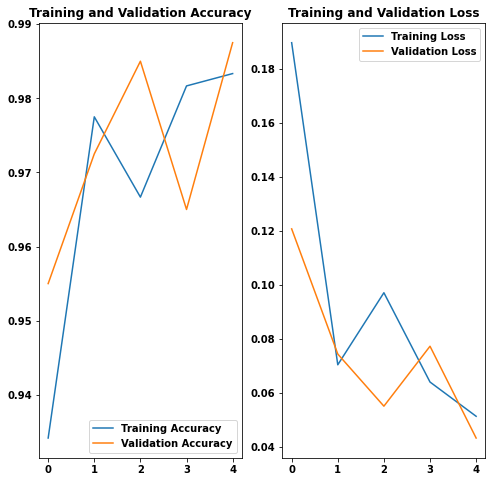

In [127]:
# 可视化验证结果
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()